# Time series forecasting project

In [1]:
# Handle imports up-front
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from pmdarima import auto_arima

## 1. Data loading

### 1.1. Load

In [2]:
dataset='flights'

In [3]:
if dataset == 'flights':
    raw_data_df=sns.load_dataset("flights")

elif dataset == 'sales':
    raw_data_df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')

### 1.2. Inspect 

In [4]:
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


### 1.3. Encode date feature

Pandas has many great tools to work with timeseries data - see the user guide article: '*[Time series / date functionality](https://pandas.pydata.org/docs/user_guide/timeseries.html)*'. First thing to do is convert our string date feature(s) to a Datetime object.

In [5]:
# Make a copy of the raw data to work with
timeseries_df=raw_data_df.copy()

# Extract the string month to a datetime object feature
timeseries_df['month']=pd.to_datetime(raw_data_df.month, format='%b').dt.month

# Use the month and year to create at 'date' datetime feature
timeseries_df['date']=pd.to_datetime(timeseries_df[['year', 'month']].assign(day=1))

# Set the datetime feature as the index
timeseries_df=timeseries_df.set_index('date')

# Keep only the passenger column
timeseries_df.drop(['year', 'month'], axis=1, inplace=True)

# Re-name 'passengers' to 'dependent_var' so we can easily swap datasets without making
# changes to the notebook
timeseries_df.rename(columns={'passengers': 'dependent_var'}, inplace=True)

# Check the result
timeseries_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   dependent_var  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


## 2. EDA

### 2.1. Baseline model performance

Let's set a quick performance baseline using a quick/easy linear regression model.

In [6]:
# Your code here! Hint use a numeric range equal to the length of the dataset for x.
linear_model=LinearRegression()

# Generate a uniform x variabel representing the time steps
x=np.array(range(len(timeseries_df))).reshape(-1, 1)

# Fit the model
fit_result=linear_model.fit(x, timeseries_df['dependent_var'])

# Make predictions over the input domain
predictions=linear_model.predict(x)

# Add the linear model predictions back to the dataframe
timeseries_df['Linear model']=predictions

# Calcualte the root mean squared error
rmse=sqrt(mean_squared_error(timeseries_df['dependent_var'], predictions))

# Save the result for later
rmse_results={'Linear model': rmse}

# Display the result for the user
print(f'Root mean square error: {rmse:.1f}')


Root mean square error: 45.7


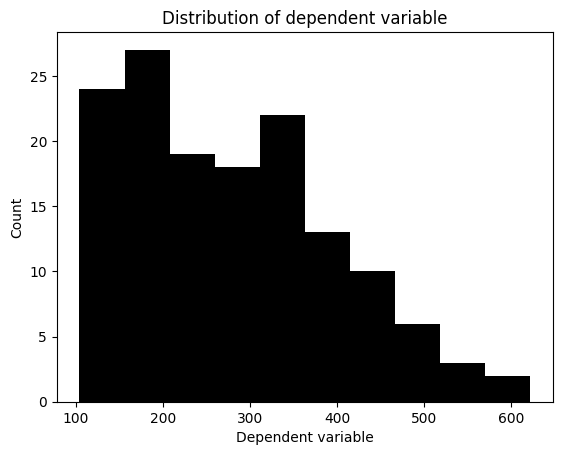

In [7]:
plt.title('Distribution of dependent variable')
plt.hist(timeseries_df['dependent_var'], color='black')
plt.xlabel('Dependent variable')
plt.ylabel('Count')
plt.show()

In [8]:
missing_data = timeseries_df.isnull().sum()

print(missing_data)

dependent_var    0
Linear model     0
dtype: int64


### 2.2. Missing, and/or extreme values

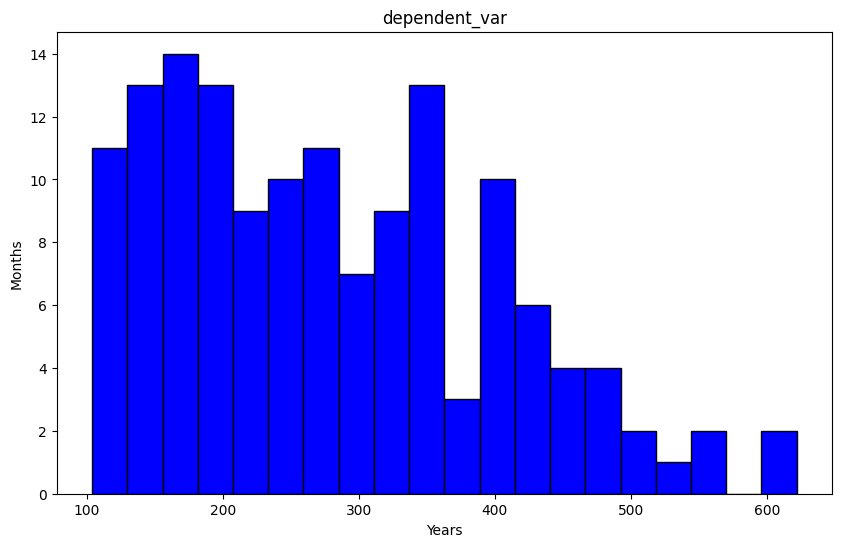

In [9]:
# Plot data as a historgram as you normaly would for any numerical data
plt.figure(figsize=(10, 6))
plt.hist(timeseries_df['dependent_var'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Years')
plt.ylabel('Months')
plt.title('dependent_var')
plt.show()

In [10]:
from fancyimpute import KNN
imputer = KNN(k=3)
imputed_data = imputer.fit_transform(timeseries_df)

Imputing row 1/144 with 0 missing, elapsed time: 0.005
Imputing row 101/144 with 0 missing, elapsed time: 0.005


/home/vscode/.local/lib/python3.10/site-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


### 2.3. Timeseries analysis

Let's now take a look at the data as a timeseries. There are a couple of things to look out for here.

1. Is the time axis regular - i.e. are the rows evenly spaced in time.
2. Is the data stationary - i.e. is there a consistent trend over time. The answer to this question will effect how we model the data.
3. Are there regular or cyclical trends - e.g. sales are high on Mondays and low on weekends.

### 2.3.1. Plot the time-series

Let's include predictions from the baseline model too and see what we are working with.

In [11]:
# Plot the data over time and include the linear regression from above

### 2.3.2. Missing timepoints

Next, do a quick check to see if the datetime index we just created is evenly spaced - i.e. the time delta between the rows is always the same.

In [12]:
# Your code here. Hint: take a look and Panda's .resample()

### 2.3.3. Stationarity

In [13]:
# Note: you want to be aware of this property of your data, but you may or may not have to do anything with this information right away!

### 2.3.4. Seasonality

In [14]:
# Note: you want to be aware of this property of your data, but you may or may not have to do anything with this information right away!

## 3. Model training

In [15]:
# Hint use the 'auto_arima()' function from pmdarima as describe in the reading on 4Geeks.

## 4. Model evaluation

This result *looks* convincing, at least if you don't look too close - but how well are we actualy doing? We need to implement test-train splitting and/or cross-validation to estimate the actual performance on unseen data!

Breaking up time-series data is a little bit harder than other types of tabular data - we can't just randomly select data points for the training and/or validation sets becuase the order matters!

Luckily, Scikit-learn can help us out here - take a look at [TimeSeriesSplit](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.TimeSeriesSplit.html).

In [16]:
# I'll leave it up to you to try and figure out a good way to evalueate this model!